### Importing Libraries

In [136]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')


### Importing data 

In [104]:
data=pd.read_csv("Mall_Customers.csv")

In [105]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income           200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [107]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##  Exploratory data analysis

## I-Univariate analysis

### 1-Age 

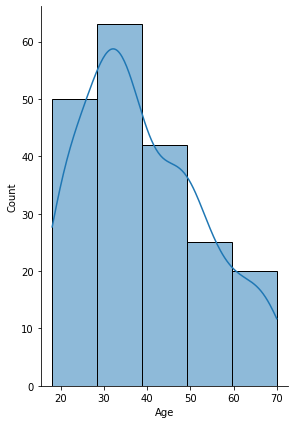

In [119]:
sns.displot(data=data,x='Age',kde=True,bins=5,height=6, aspect=0.7)

### 2-Income 

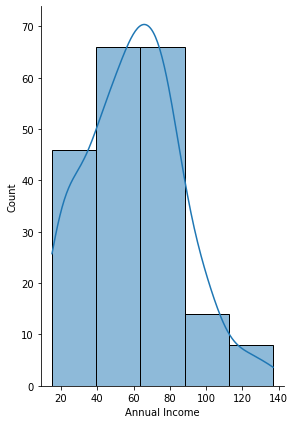

In [120]:
sns.displot(data=data,x='Annual Income',kde=True,bins=5,height=6, aspect=0.7)

### 3-Spending Score

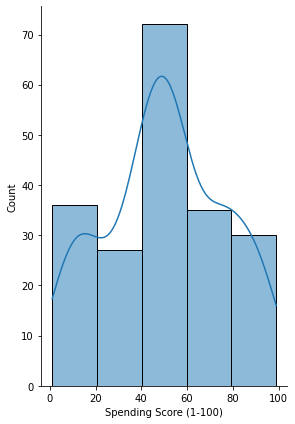

In [121]:
sns.displot(data=data,x='Spending Score (1-100)',kde=True,bins=5,height=6, aspect=0.7)

### 4-Gender

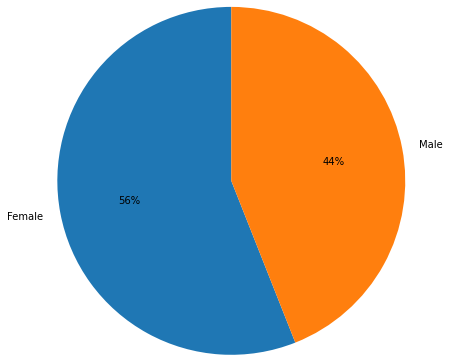

In [123]:
gender_dist =pd.DataFrame (data['Gender'].value_counts(normalize=True))
mylabels =gender_dist.index
y=gender_dist['Gender']


plt.pie(y, labels = mylabels,autopct='%.0f%%',startangle = 90,radius=2)
plt.show() 

## II-Bivariate analysis

### 1- Annual Invcome & gender vs Spending score  

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score (1-100)'>

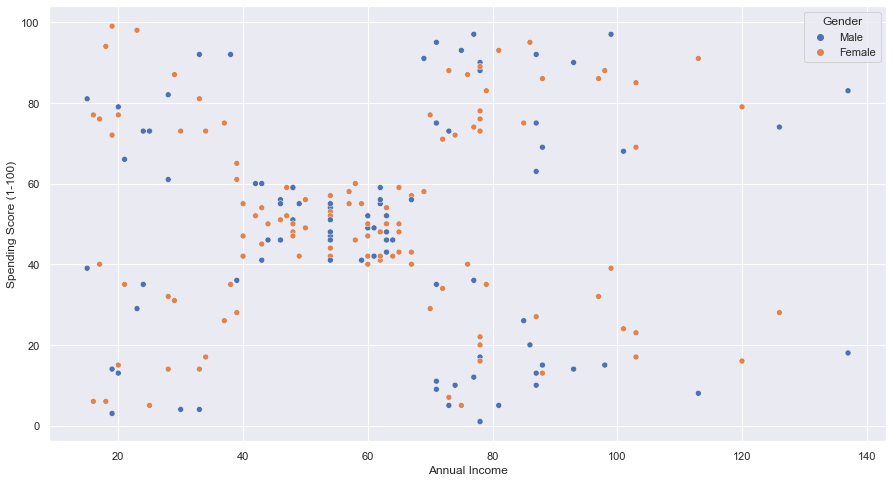

In [130]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=data,x=data['Annual Income'],y=data['Spending Score (1-100)'],hue='Gender')

### 2- Age & gender vs Spending score 

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

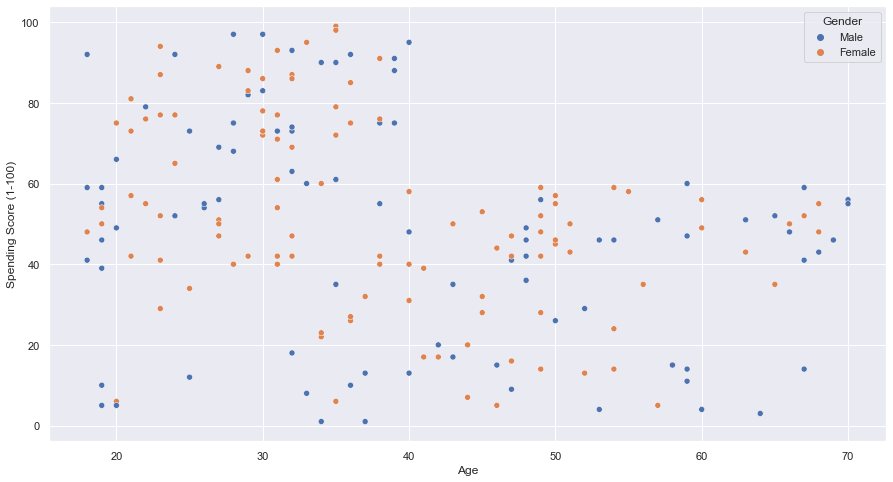

In [133]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=data,x=data['Age'],y=data['Spending Score (1-100)'],hue='Gender')

## k-means Application 

### I-determining the right value of K 

### Elbow Plot 

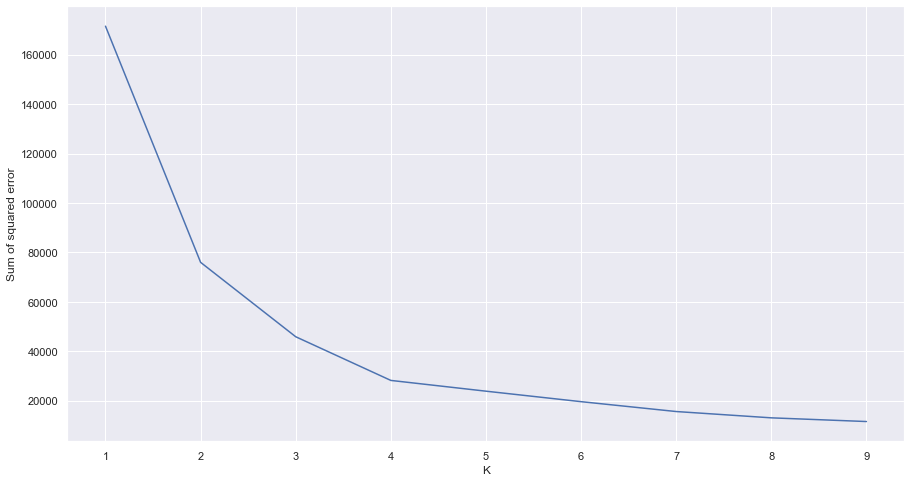

In [139]:
#Looping through the SSE  
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)
#Plotting     
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [147]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Age','Spending Score (1-100)']])
data['cluster']=y_predicted


### Representation

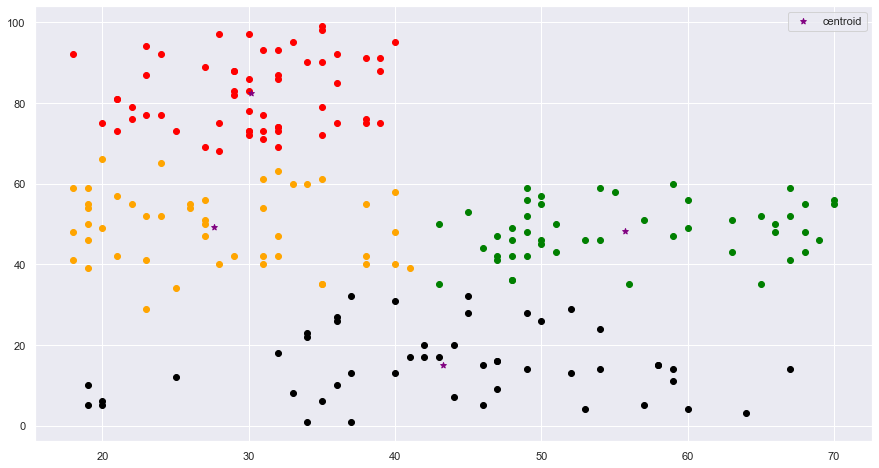

In [149]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]
plt.scatter(df1.Age,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='black')
plt.scatter(df4.Age,df4['Spending Score (1-100)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()